## На базе разбора книги "Грокаем алгоритмы". Разобрано больше, потому как в книге информации мало и многие вещи разобраны довольно слабо.

### 1. Бинарный поиск
- Массив должен быть отсортирован
- Сложность $O(log_2n)$

In [77]:
def binary_search(data: list, question: int) -> int:
    low = 0 # инициализируем левую границу
    high = len(data)-1 # инициализируем правую границу
    while low <= high: # до тех пор, пока левая граница меньше или равна правой
        mid = (high+low)//2 # делим пополам, выбираем центральный элемент
        if question == data[mid]: # если совпало - выходим
            return mid
        elif data[mid] > question: # если центральнй элемент больше, уменьшаем правую границу
            high = mid - 1
        else: # если центральный элемент меньше, увеличиваем левую границу.
            low = mid + 1 
    return None # если ничего не нашлось, возвращаем None

In [78]:
import string
test_array = [letter for letter in string.ascii_lowercase]
print(test_array)
print('У буквы j индекс -', binary_search(test_array, 'j'))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
У буквы j индекс - 9


### 2. Сортировка пузырьком.
- Сложность $O(n^2)$
- Используется только как обучающий.
- Есть улучшающие модификации

In [87]:
def bubble_sort(data: list) -> list:
    for i in range(len(data)-1): # Внешний цикл, n-1 проходов.
        for j in range(len(data)-i-1): # Внутренний цикл. n-i-1 сравнений.
            if data[j] > data[j+1]: 
                data[j], data[j+1] = data[j+1], data[j] # каждая пара сортируется по возрастанию
    return data

In [88]:
import random
bs_test_array = [i for i in range(50)]
random.shuffle(bs_test_array)
print(bs_test_array)
print(bubble_sort(bs_test_array))

[32, 42, 26, 0, 49, 29, 35, 45, 8, 40, 43, 10, 41, 22, 31, 18, 5, 47, 37, 17, 11, 38, 9, 20, 1, 36, 3, 12, 15, 6, 44, 28, 33, 34, 30, 4, 16, 7, 24, 19, 46, 48, 25, 13, 2, 23, 27, 14, 39, 21]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [89]:
# Можно немного сократить количество операций, проверяя были ли перестановки.
# И если перестановок в цикле не было ни одной - завершать работу.

def better_bubble_sort(data: list):
    n = len(data)
    swapped = True # Флаг, были ли перестановки.
    i = -1 # Счетчик для внутреннего цикла
    
    while swapped: # если перестановки были, продолжаем цикл
        i +=1
        swapped = False
        for j in range(n-i-1):
            if data[j] > data[j+1]:
                data[j],data[j+1] = data[j+1],data[j]
                swapped = True
    return data

In [90]:
bs_test_array = [i for i in range(50)]
random.shuffle(bs_test_array)
print(bs_test_array)
print(better_bubble_sort(bs_test_array))

[15, 27, 21, 40, 0, 23, 6, 17, 25, 36, 9, 31, 11, 2, 32, 37, 5, 38, 49, 1, 16, 33, 20, 18, 45, 42, 8, 19, 3, 41, 28, 12, 26, 22, 14, 44, 48, 39, 43, 35, 34, 24, 13, 29, 30, 10, 4, 47, 46, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [92]:
%%timeit
test_array = list(range(10000))
random.shuffle(test_array)
better_bubble_sort(test_array)

13.8 s ± 59.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 3. Сортировка выбором.
- Быстрее пузырьковой сортировки, поскольку смена позиций элементов происходит только 1 раз во внутреннем цикле
- Всё так же нестабильна как и пузырьковая
- Сложность также $O(n^2)$ в худшем случае

In [94]:
def selection_sort(data: list) -> list:
    for i in range(len(data)):
        min_idx = i
        for j in range(i+1, len(data)): # находим индекс минимального элемента в списке
            if data[j] < data[min_idx]:
                min_idx = j
        data[i],data[min_idx] = data[min_idx],data[i] # меняем текущий элемент с минимальным местами
    return data

In [95]:
%%timeit
test_array = list(range(10000))
random.shuffle(test_array)
selection_sort(test_array)

5.56 s ± 31.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 4. Быстрая сортировка
- Рекурсивный алгоритм
- Худшее время $O(n^2)$
- Среднее время, оно же лучшее $O(n*log n)$

In [96]:
def quick_sort(data: list) -> list:
    if len(data) < 2: # Базовый случай. Длина массива меньше двух.
        return data
    else:
        pivot = data.pop(random.randint(0,len(data)-1)) # выбираем случайный опорный элемент
        lesser = [elem for elem in data if elem < pivot] # массив элементов меньше опорного
        greater = [elem for elem in data if elem >= pivot] # массив элементов больше опорного
        return quick_sort(lesser) + [pivot] + quick_sort(greater) # дважды рекурсивно вызываем сортировку и конкатенируем результаты с опорным элементом.

In [97]:
%%timeit
test_array = list(range(10000))
random.shuffle(test_array)
quick_sort(test_array)

46.6 ms ± 951 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 4a. Быстрая сортировка без использования дополнительной памяти. С разбиением Хоара.

In [98]:
def true_quicksort(data: list):
    # пока размер массива больше 1 разбиваем массив на части и рекурсивно применяем эту же функцию
    def hoar_sort(data: list, low: int, high: int):
        if low < high:
            pivot = partition(data, low, high)
            hoar_sort(data, low, pivot)
            hoar_sort(data, pivot+1, high)
    
    # разбиене Хоара. Двигаемся с двух сторон, меняем местами элементы больше и меньше опорного.
    # возвращаем индекс опорного элемента в пересортированном массиве        
    def partition(data: list, low, high):
        pivot = data[random.randint(low,high)]
        
        while True:
            while data[low] < pivot:
                low += 1
            while data[high] > pivot:
                high -= 1
            if low >= high:
                return low
            data[low],data[high] = data[high],data[low]
            
    hoar_sort(data, 0, len(data)-1)

In [99]:
%%timeit
test_array = list(range(10000))
random.shuffle(test_array)
true_quicksort(test_array)

77.9 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 5. Сортировка вставками
- Временная сложность $O(n^2)$

In [100]:
def insertion_sort(data: list):
    # цикл от 1 до конца массива.
    for i in range(1,len(data)):
        # сохраняем ключевой элемент(каждый раз новый)
        key = data[i]
        j = i-1 # смещаемся на 1 элемент назад
        # далее поочерёдно проверяем элементы от текущего положения
        # до начала массива. Если элемент больше ключевого, то смещаем его на 1 позицию вправо.
        # после этого уменьшаем индекс и проверяем следующий элемент. Если и он больше ключевого,
        # смещаем его тоже на 1 позицию вправо. И так до тех пор, пока не наткнемся на элемент меньше или равный ключевому,
        # или доберёмся до начала массива. 
        # Таким образом мы последовательно смещаем весь массив со значениями больше ключевого - вправо.
        while (j >= 0) and (data[j] > key):
            data[j+1] = data[j]
            j -=1
        # и наконец вставляем ключевой элемент на нужную позицию (элемент слева - меньше или равен ключевому, элементы справ - больше)
        data[j+1] = key

In [101]:
%%timeit
test_array = list(range(10000))
random.shuffle(test_array)
insertion_sort(test_array)

7.01 s ± 31.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 6. Сортировка слиянием
 - временная сложность $O(n\cdot logn)$
 - константы больше чем у quicksort, поэтому работает в среднем чуть медленнее
 - требует дополнительной памяти, столько же, сколько занимает исходный массив
 - спокойно работае с данными, поддерживающими только последовательный доступ(связанные списки)

In [102]:
def merge_sort(data: list):
    # Базовый случай, массив размера меньше 2 уже отсортирован.
    if len(data) < 2:
        return data
    # Делим массив на две примерно равные части
    L = merge_sort(data[:len(data) // 2])
    R = merge_sort(data[len(data) // 2:]) 
    # Переменные для индексов правого, левого и результирующего массивов
    n = m = k = 0
    # Создаём результирующий массив, такого же размера, как исходный.
    C = [0] * (len(L) + len(R))
    # Непосредственно само слияние массивов
    while n < len(L) and m < len(R): # пока не пройден хотя бы один из двух массивов полностью.
        # Сравниваем элементы двух массивов.
        # Меньший из них записываем в результирующий массив. 
        # Увеличиваем индекс этого подмассива и результирующего массива на единицу
        if L[n] <= R[m]:
            C[k] = L[n]
            n += 1
        else:
            C[k] = R[m]
            m += 1
        k += 1
    # Прикрепляем "остатки"
    # Если любой из подмассивов закончился, а другой ещё нет,
    # Добавляем все элементы оставшегося подмассива в результирующий.
    while n < len(L):
        C[k] = L[n]
        n += 1
        k += 1
    while m < len(R):
        C[k] = R[m]
        m += 1
        k += 1
    # Переписываем исходный массив и возвращаем его.
    for i in range(len(data)):
        data[i] = C[i]
    return data

In [103]:
%%timeit
test_array = list(range(10000))
random.shuffle(test_array)
merge_sort(test_array)

98 ms ± 852 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 7. Timsort.
- Объединяет сортировку вставками и сортировку слиянием
- Реализация сложная, разберу позже. Будет мне челленджем.
- Основная идея - поиск уже отсортированных подмассивов в исходном массиве. Логично предполагается, что в реальной жизни большинство массивов, требующих сортировки, содержат в себе большое количество уже отсортированных подмассивов, и на их сортировку не нужно тратить времени. Можно сразу слияние осуществлять.

## Графы

### 8. Поиск в ширину. (Breadth-Frist Search)
- Последовательно проходит по всем соседям исходного узла, затем по соседям каждого из них и т.д.
- используется очередь. LIFO. В python удобно deque из collections использовать.
- Сложность $O(V+E)$, где V - число вершин(узлов), E - число рёбер
  

In [104]:
import graphviz
from collections import deque

In [105]:
# Опишем граф в виде словаря списков
graph = {}
graph['you'] = ['alice','bob','claire']
graph['bob'] = ['anuj','peggy','you']
graph['alice'] = ['peggy','you']
graph['claire'] = ['thom','jonny','you']
graph['anuj'] = ['bob']
graph['peggy'] = ['bob','alice']
graph['thom'] = ['claire']
graph['jonny'] = ['claire']
graph

{'you': ['alice', 'bob', 'claire'],
 'bob': ['anuj', 'peggy', 'you'],
 'alice': ['peggy', 'you'],
 'claire': ['thom', 'jonny', 'you'],
 'anuj': ['bob'],
 'peggy': ['bob', 'alice'],
 'thom': ['claire'],
 'jonny': ['claire']}

In [106]:
# Словарь с информацией о том является ли человек продавцом
mango_seller_info = {}
for name in set(name for name in graph):
    mango_seller_info.setdefault(name,False)
mango_seller_info['anuj'] = True
mango_seller_info

{'claire': False,
 'thom': False,
 'alice': False,
 'you': False,
 'jonny': False,
 'anuj': True,
 'peggy': False,
 'bob': False}

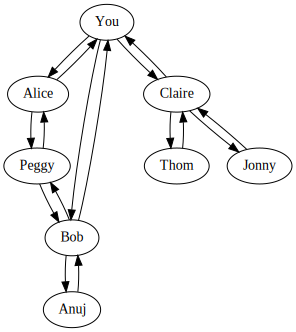

In [107]:
# для визуализации графа используем graphviz
tg = graphviz.Digraph('test_graph')
for name in graph:
    tg.edges((name.capitalize(), i.capitalize()) for i in graph[name])
tg

In [110]:
# Передаем в качестве аргумента исходный узел
def BFS(root):
    search_queue = deque() # создаем очередь
    search_queue.append(root)
    parents = {root: None} # для трэйсбэка и прямо по нему и будем проверять посещён узел или нет
    while search_queue: # пока очередь не пуста
        person = search_queue.popleft() # достаем очередной узел из очереди
        if mango_seller_info[person]: # проверяем условие (в нашем случае продавец манго)
            res = []
            current = person
            while parents[current] != None:
                res.append(parents[current])
                current = parents[current]
            print('traceback:',[person] + res, 'length =',len(res))
            return person.capitalize() + ' is mango seller!' # при успехе возвращаем сообщение
        else:
            for elem in graph[person]:
                if elem not in parents: 
                    search_queue += [elem] # в противном случае добавляем всех соседей этого узла
                    parents[elem] = person
    return 'There are no mango sellers in graph' # если просмотрели весь граф и не нашли необходимого, возвращаем сообщение

In [111]:
BFS('you')

traceback: ['anuj', 'bob', 'you'] length = 2


'Anuj is mango seller!'

#### Усложняем

In [112]:
from typing import List, Tuple, Dict

In [113]:
# Попробую реализовать поиск кратчайшего пути на карте в виде квадратной сетки.
# "Лабиринт" будет выглядеть вот так. Это сетка 7х7.
# S - start, G - goal, # - wall
'''# # # # # . #
   # . . . . . #
   # . # . # # #
   # . # . . . .
   S . # . # # .
   . . # . # G .
   # # # . # . .'''

# Заведём тип, координата тайла
GridCoord = Tuple[int,int]

# Создадим класс SquareGrid, который будет описывать прямоугольную сетку из тайлов.
class SquareGrid():
   def __init__(self, width: int, height: int):
      self.width = width
      self.height = height
      self.walls: List[GridCoord] = [] # координаты стенок
   
   # проверка на нахождение в границах сетки
   def in_bounds(self, id: GridCoord) -> bool: 
          (x,y) = id
          return (0 <= x < self.width) and (0 <= y < self.height)
   
   # проверка не является ли координата стенкой
   def passable(self, id: GridCoord) -> bool:
      return (id not in self.walls)    
   
   # Вычисление соседей. Незачем запоминать весь список соседей.
   # На ходу проверяем в границах ли ближайшие 4 координаты справа, слева, сверху и снизу
   # И не являются ли они стенами. Возвращаем список координат соседей.
   def neighbours(self, id: GridCoord) -> List[GridCoord]:
      (x,y) = id
      neighbours = [(x+1,y),(x-1,y),(x,y-1),(x,y+1)]
      if (x+y) % 2 == 0: neighbours.reverse()
      result = list(filter(self.in_bounds, neighbours))
      result = list(filter(self.passable, result))
      return result

# Вспомогательная функция, чтобы просто передавать порядковые номера тайлов
# а не писать полотно из кортежей
def from_number(number: int, width: int, height: int) -> GridCoord:
   return number%width, number//height

# Функции визуализации одного тайла
def plot_tile(graph, id, style):
    r = "\033[0m . "
    # Это для визуализации весов рёбер, для последующей реализации алгоритма Дейкстры
    if 'number' in style and id in style['number']: r = "\033[0m" + " %-2d" % style['number'][id]
    # Если отработал любой алгоритм и есть список "родителей",
    # можно визуализировать откуда пришли в каждый тайл
    if 'point_to' in style and style['point_to'].get(id, None) is not None:
        (x1, y1) = id
        (x2, y2) = style['point_to'][id]
        if x2 == x1 + 1: r = " > "
        if x2 == x1 - 1: r = " < "
        if y2 == y1 + 1: r = " v "
        if y2 == y1 - 1: r = " ^ "
    if 'forest' in style and id in style['forest']:
        r = "\033[42m " + '%-2d' % style['number'][id]
    # Если есть путь, то визуализиуем его
    if 'path' in style and id in style['path']:   r = "\033[0m @ "
    # Здесь отмечаем стартовую и финишную точки
    if 'start' in style and id == style['start']: r = "\033[0m\33[31m S "
    if 'goal' in style and id == style['goal']:   r = "\033[0m\33[33m G "
    # И если есть стенки - их тоже визуализируем
    if id in graph.walls: r = "\033[0m###"
    return r

# Функция для визуализации всей сетки 
def plot_grid(graph, **style):
    print("___" * graph.width)
    for y in range(graph.height):
        for x in range(graph.width):
            print("%s" % plot_tile(graph, (x, y), style), end="")
        print()
    print("~~~" * graph.width)

# Сам алгоритм поиска, всё так, же как и в предыдущей реализации
def breadth_first_search(graph, start: GridCoord, goal: GridCoord):
    queue = deque() # Создаём очередь
    queue += [start] # Добавляем начальный узел
    parents: Dict[GridCoord, List[GridCoord]] = {} # Инициализируем словарь родителей для узлов
    parents[start] = None # Для исходного узла родителей нет
    
    while queue: # Пока очередь не пуста
        current: GridCoord = queue.popleft() # Достаём первый узел из очереди
        
        if current == goal: # Если нашли цель, завершаем алгоритм
            break
        
        for next in graph.neighbours(current): # иначе вытаскиваем всех соседей
            if next not in parents: # если нету в уже пройденных
                queue += [next] # добавляем в очередь
                parents[next] = current # назначаем текущий тайл родителем для каждого из соседей
    
    return parents

# Функция воссоздания пути.
# Передаём словарь "родителей" и стартовые и финишные координаты
def reconstruct_path(parents: Dict[GridCoord, GridCoord],
                     start: GridCoord, goal: GridCoord) -> List[GridCoord]:
    
    current: GridCoord = goal # Начинаем с финиша
    path: List[GridCoord] = [] # Инициализируем путь
    while current != start: # пока текущий узел не является стартовым
        path.append(current) # добавляем сам узел в путь
        current = parents[current] # назначаем "родительский" узел текущим
    path.append(start) # в конце добавляем стартовый узел
    path.reverse() # разворачиваем, чтобы путь от начала до конца выводился, а не наоборот
    return path

In [115]:
# Проверяем. Создаём сетку 7х7
mygrid = SquareGrid(7,7)
# генерим координаты стенок
mygrid.walls = [from_number(i,7,7) for i in map(lambda x: x-1, [1,2,3,4,5,7,8,14,15,17,19,20,21,22,24,31,33,34,38,40,43,44,45,47])]
# Словарь с дополнительными параметрами для визуализации
style = {}
style['start'] = (0,4) # стартовые координаты
style['goal'] = (5,5) # финишные координаты
plot_grid(mygrid, **style)

# Записываем в словарь результаты работы алгоритма и восстановления пути
style['point_to'] = breadth_first_search(mygrid, (0,4), (5,5))
style['path'] = reconstruct_path(style['point_to'], style['start'], style['goal'])
plot_grid(mygrid, **style)

_____________________
############### . ###
### .  .  .  .  . ###
### . ### . #########
### . ### .  .  .  . 
 S  . ### . ###### . 
 .  . ### . ### G  . 
######### . ### .  . 
~~~~~~~~~~~~~~~~~~~~~
_____________________
############### v ###
### @  @  @  <  < ###
### @ ### @ #########
### @ ### @  @  @  @ 
 S  @ ### ^ ###### @ 
 ^  < ### ^ ### G  @ 
######### ^ ### .  ^ 
~~~~~~~~~~~~~~~~~~~~~


### 9. Алгоритм Дейкстры.
- Работает только на направленных ациклических графах. DAG(directed acyclic grph)
- Рёбра не могут иметь отрицательного веса. Для рёбер с отрицательным весом надо использовать алгоритм Беллмана-Форда
- Находит маршрут с минимальной стоимостью

In [116]:
# Создаем взвешенный граф
# Значения - веса рёбер
weighted_graph = {'Книга':{'Пластинка':5, "Постер":0},
                  'Пластинка': {'Бас-гитара':15, "Барабан":20},
                  'Постер': {'Бас-гитара':30, "Барабан":35},
                  'Бас-гитара': {'Пианино':20},
                  'Барабан': {"Пианино":10},
                  'Пианино': {}
                 }

# Создаём словарь стоимостей для каждого узла
unk = float('inf')
costs = {"Книга": 0,
         "Пластинка": 5,
         "Постер": 0,
         "Бас-гитара": unk,
         "Барабан": unk,
         "Пианино": unk
         }

# Создаём словарь родителей
parents = {'Книга': None,
           'Пластинка': "Книга",
           "Постер": "Книга",
           "Бас-гитара": None,
           "Барабан": None,
           "Пианино": None}

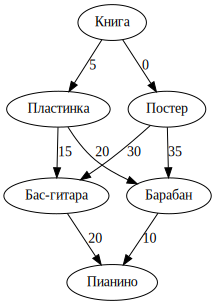

In [117]:
# Визуализируем взвешенный граф
test_graph = graphviz.Digraph()
for elem in weighted_graph:
    for child in weighted_graph[elem]:
        test_graph.edge(elem,child, label=str(weighted_graph[elem][child]))
test_graph

In [118]:
from functools import reduce
# Сам алгоритм
def dijkstra_algorithm(graph, costs, parents, start, goal) -> list:
    # Список обработанных узлов
    processed = []
    # Начинаем со стартового узла
    current_node = start
    while current_node is not None: # пока остаются необработанные узлы
        cost = costs[current_node] # Стоимость текущего узла
        neighbours = graph[current_node] # соседи текущего узла
        for n in neighbours.keys():
            new_cost = cost + neighbours[n] # обновляем стоимость каждого соседа
            if costs[n] > new_cost: # если стоимость получилась ниже обновляем стоимость и назначаем нового родителя
                costs[n] = new_cost
                parents[n] = current_node
        processed.append(current_node)
        # Текущим узлом становится узел с минимальной стоимостью
        current_node = find_lowest_cost_node(costs, processed)
    # Возвращаем путь и общую стоимость.
    return path_reconstruction(parents, start, goal), costs[goal]

# Восстановление пути
def path_reconstruction(parents,start, goal) -> list:
    path = []
    current_node = goal
    while current_node != start:
        path.append(current_node)
        current_node = parents[current_node]
    path.append(current_node)
    path.reverse()
    return path

# Нахождение узла с минимальной стоимостью
def find_lowest_cost_node(costs, processed):
    lowest_cost = float('inf')
    lowest_cost_node = None
    for node in costs:
        cost = costs[node]
        if (node not in processed) and (cost < lowest_cost):
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node


trace, cost = dijkstra_algorithm(weighted_graph,costs,parents,'Книга','Пианино')
print('Последовательность обменов:', reduce(lambda x,y: x+'->'+y, trace),'\nИтоговая стоимость:', cost)
    

Последовательность обменов: Книга->Пластинка->Барабан->Пианино 
Итоговая стоимость: 35


#### Усложняем

In [121]:
# Опять же попробуем реализовать алгоритм Дейкстры для сетки.
# Например это игровая карта с разными стоимостями прохода по разным клеткам.

# Можно не делать отдельную функцию для поиска узла с наименьшей стоимостью.
# Вместо этого можно воспользоваться реализацией двоичной кучи из модуля heapq
import heapq
from typing import TypeVar, Optional

# произвольный тип
T = TypeVar('T')

# класс сетки с весами.
# наследник обычной сетки
# при инициализации добавляем веса, добавляем метод cost возвращающий стоимость достижения узла
class GridWithWeights(SquareGrid):
    def __init__(self, width: int, height: int):
        super().__init__(width, height)
        self.weights: Dict[GridCoord, float] = {}
    
    def cost(self, to_node: GridCoord) -> float:
        return self.weights.get(to_node, 1) # возвращает 1 если веса нет в словаре.

# Обёртка для очереди с приоритетом, на базе двоичной кучи
# Заворачиваем push и pop в методы get и put для удобства
# добавляем метод, возвращающий True если очередь пуста.
class PriorityQueue:
    def __init__(self):
        self.elements: List[Tuple[float, T]] = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item: T, priority: float):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self) -> T:
        return heapq.heappop(self.elements)[1]

# Сам алгоритм
# Передаем в качестве атрибутов граф, координаты старта и финиша
def dijkstra_search(graph: GridWithWeights, start: GridCoord, goal: GridCoord):
    queue = PriorityQueue() # Инициализируем очередь.
    queue.put(start, 0) # добавляем в очередь стартовый "узел"
    parents: Dict[GridCoord, Optional[GridCoord]] = {} # инициализируем словарь "родителей"
    costs: Dict[GridCoord, float] = {} # инициализируем словарь со стоимостями для каждого узла
    parents[start] = None # у начального узла родителей нет
    costs[start] = 0 # стоимость его достижения - нулевая
    
    while not queue.empty(): # пока очередь не пуста
        current: GridCoord = queue.get() # получаем узел с наименьшим приоритетом
        
        if current == goal: # если это финишный узел - алгоритм заканчивает работу
            break
        
        for next in graph.neighbours(current): # если нет, то для каждого из соседей
            new_cost = costs[current] + graph.cost(next) # рассчитываем стоимость его достижения через текущий узел
            if next not in costs or new_cost < costs[next]: # если новая стоимость меньше текущей
                costs[next] = new_cost # обновляем стоимость
                priority = new_cost # записываем её как приоритет
                queue.put(next, priority) # добавляем узел в очередь, вместе с приоритетом
                parents[next] = current # обновляем "родительский" узел для этого соседа
    
    return parents, costs # возвращаем список родителей и список стоимостей

In [123]:
# Создадим сетку 10х10. Карту с "горой" и "лесом".
# Гора - стенки. Лес - тайлы с большими весами в центре.
game_map = GridWithWeights(10,10)
game_map.weights = dict(zip([(i,j) for j in range(10) for i in range(10)], 
                        [5,4,5,6,7,8,9,10,11,12,
                        4,3,4,5,26,31,10,11,12,13,
                        3,2,3,4,29,18,22,12,13,14,
                        2,1,2,3,18,16,48,17,14,15,
                        1,1,1,18,34,46,21,20,15,16,
                        2,1,2,7,29,47,22,21,6,17,
                        3,2,3,4,9,34,29,36,17,18,
                        4,1,1,1,14,29,18,15,16,17,
                        5,1,1,1,15,16,13,14,15,16,
                        6,7,8,9,10,11,12,13,14,15]))
game_map.walls = [from_number(i,10,10) for i in [71,72,73,81,82,83]]
forest = [from_number(i,10,10) for i in [14,15,24,25,26,34,35,36,37,43,44,45,46,47,53,54,55,56,57,64,65,66,74,75,76,84,85]]
start = (1,4)
goal = (8,5)
plot_grid(game_map, number=game_map.weights, forest=forest)

p,c = dijkstra_search(game_map,start,goal)

plot_grid(game_map, number=game_map.weights, start=start, goal=goal, forest=forest, path = reconstruct_path(p,start,goal))

print('Минимальная стоимость пути:', c[goal])

______________________________
 5  4  5  6  7  8  9  10 11 12
 4  3  4  5  26 31 10 11 12 13
 3  2  3  4  29 18 22 12 13 14
 2  1  2  3  18 16 48 17 14 15
 1  1  1  18 34 46 21 20 15 16
 2  1  2  7  29 47 22 21 6  17
 3  2  3  4  9  34 29 36 17 18
 4 ######### 14 29 18 15 16 17
 5 ######### 15 16 13 14 15 16
 6  7  8  9  10 11 12 13 14 15
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
______________________________
 5  @  @  @  @  @  @  10 11 12
 4  @  4  5  26 31 @  @  12 13
 3  @  3  4  29 18 22 @  @  14
 2  @  2  3  18 16 48 17 @  15
 1  S  1  18 34 46 21 20 @  16
 2  1  2  7  29 47 22 21 G  17
 3  2  3  4  9  34 29 36 17 18
 4 ######### 14 29 18 15 16 17
 5 ######### 15 16 13 14 15 16
 6  7  8  9  10 11 12 13 14 15
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Минимальная стоимость пути: 126


## Жадные алгоритмы
- Основная идея: на каждом шаге выбирается локально-оптимальное решение. 
- По итогу получается глобальное решение близкое к оптимуму. Но вовсе не обязательно оптимальное.
- Позволяют решать NP-полные задачи с приемлемой точностью за адекватное время.

### 10. Покрытие множества
- Вводные: есть 5 радиостанций, каждая покрывает определённое количество штатов. 
- Есть 8 штатов.
- Необходимо найти минимальный набор радиостанций, который покрывает все требуемые штаты.

In [124]:
# Воспользуемся множествами
# Список штатов, которые необходимо охватить
states_needed = {'mt','wa','or','id','nv','ut','ca','az'}

# Станции и покрытие каждой из них, в виде словаря множеств
stations = {
            'kone': {'id','nv','ut'},
            'ktwo': {'wa','id','mt'},
            'kthree': {'or','nv','ca'},
            'kfour': {'nv','ut'},
            'kfive': {'ca','az'}
            }

# Итоговый список станций.
final_stations = set()


# Сам алгоритм.
while states_needed: # пока список штатов, которые надо охватить не пуст
    # выбираем станцию, которая покрывает наибольшее количество ещё не покрытых штатов.
    best_station = None # Лучшая по покрытию станция
    states_covered = set() # Штаты которые охватывает станция, из тех, что ещё не охвачены.
    for station, states in stations.items(): # Перебираем все станции из списка
        covered = states_needed & states # Пересечение двух множеств. Между оставшимися неохваченными штатами и штатами, которые охватывает текущая станция.
        if len(covered) > len(states_covered): # Если станция покрывает больше штатов, чем текущая, из тех что ещё не охвачены
            best_station = station # Назначаем новую лучшую станцию
            states_covered = covered # Записываем охватываемые штаты
    states_needed -= states_covered # Убираем охваченные штаты из списка необходимых
    final_stations.add(best_station) # Добавляем лучшую станцию к итоговому списку
    # И алгоритм продолжает работать
    # Можно ещё удалять из словаря уже отобранные станции, 
    # чтобы каждый раз не проверять весь словарь.
    del stations[best_station]
print(final_stations)

{'kthree', 'kone', 'ktwo', 'kfive'}


### 11. Динамическое программирование
Основные идеи:
- Как и в жадных алгоритмах задача разбивается на подзадачи. Но динамическое программирование применимо к задачам с оптимальной подструктурой. Когда есть набор перекрывающихся подзадач, каждая из которых чуть проще итоговой.
- Решаются подзадачи, их решения объединяются для решения глобальной задачи. 
- Два варианта. Либо прямой проход с мемоизацией(запоминанием) результатов решения подзадач. Либо обратный проход, когда задача рекурсивно разбивается на подзадачи и они решаются.
- Важный момент. Если в жадных алгоритмах ищется оптимальное решение только на текущем шаге, то в динамическом программировании учитывается вся цепочка от текущего шага и до конца. И оценивается вся совокупность таких цепочек и уже из них выбирается оптимальный вариант.
 - По-сути всё сводится к уравнению Беллмана. Если брать дискретные состояния. Для непрерывных - это уравнение Гамильтона-Якоби-Беллмана.
 - $V(x) = \max\limits_{a\in\Gamma(x)} \{F(x,a)+\beta V(T(x,a))\}$ - уравнение Беллмана
 - $x$ - состояние, $a$ - действие, $\Gamma(x)$ - пространство возможных действий для текущего состояния, $T(x,a)$ - функция нового состояния, зависит от текущего состояния и выбранного действия
 - $F(x,a)$ - функция вознаграждения (payoff). $\beta$ - коэффициент дисконтирования. $V(x)$ - Функция стоимости(value function). 
 - Решением как раз является нахождение такой функции, которая максимизирует суммарное дисконтированное вознаграждение.
 - В решении задач о размене и о рюкзаке мы суммы от 0 до N и вместимость рюкзака от 0 до N считаем состояниями. А номиналы монет и веса предметов - соответственно действиями. Функции вознаграждения уже определены. Тогда как в том же RL(например Q-learning) нам необходимо искать всё это, инициализируя таблицу случайными числами.

11.а. Самый простой пример.
- Числа Фибоначчи.
- Часто ещё формулируется как задача о прыжках кузнечика. Есть некий отрезок длины n. Кузнечик может прыгать на 1 и на 2 вперёд. Сколько есть способов добраться до точки n.
- Скорость выполнения конечно гораздо быстрее, чем у чистой рекурсии, как минимум потому, что не не нужно вычислять fib для тех значений, которые уже были получены.
- Но это дополнительные затраты памяти.

In [125]:
# Вариант 1. Рекурсия с кэшированием.
def fib_cache(n:int) -> int:
    cache = [0 for _ in range(n+1)] # создаём список под кэш
    def _fib_cache(n: int) -> int:
        if n <= 1: 
            return n
        if cache[n] == 0: # Если значения нет в кэше, заполняем значение рекурсивно вызывая функцию для n-1 и n-2
            cache[n] = _fib_cache(n-1)+_fib_cache(n-2)
        return cache[n]
    return _fib_cache(n)

for i in range(50):
    print(fib_cache(i), end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 

In [126]:
# Вариант 2. Без рекурсии.
def fib_forward(n):
    f = [0 for _ in range(max(2,n+1))] # Создаём массив размерам минимум 2, максимум n+1
    # Заполняем первые два значения
    f[0] = 0 
    f[1] = 1
    for i in range(2,n+1): # Проходимся циклом, заполняя массив
        f[i] = f[i-1]+f[i-2] # Каждый элемент это сумма двух предыдущих
    return f[n]

for i in range(50):
    print(fib_forward(i), end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 

In [127]:
# То же, используя только 2 переменных, для хранения результатов.
def fib_new(n: int) -> int:
    f = [0,1]
    for i in range(2,n+1):
        f[0],f[1] = f[1],f[0]+f[1]
    return f[0] if n==0 else f[1]

for i in range(50):
    print(fib_new(i), end=', ')

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 

11.б. Задача о сдаче(размене).
- Есть набор монет разных номиналов (например 1,3,5,10 копеек).
- Нужно найти минимальное количество монет, которыми можно выдать сдачу размера N.
- Чем хороша задача в качестве примера - жадные алгоритмы на ней дают неоптимальное решение. 
- Пример: У нас есть монеты номиналом 10, 9 и 1 копейка. Нужно выдать сдачу 18 копеек. Жадный способ выберет 10 копеек и 8 раз по 1 копейке. Всего 9 монет. Тогда как оптимальное решение в данном случае 2 монеты по 9 копеек.

In [128]:
# Сам алгоритм
def min_change(n: int, coins: tuple) -> int:
    F=[0,1] # Задаём первые два результата. Для 0 - 0 монет, для 1 - 1 монета в 1 копейку.
    for i in range(2,n+1): # Цикл от 2 до необходимой суммы.
        # Рекуррентная функция, 1 + минимум от всех возможных вариантов. Если текущая сумма меньше номинала монеты - мы не можем её учитывать. 
        # Очевидно мы не можем выдать сдачу , к примеру, 4 используя монету номиналом 5.
        F+=[1+min([F[i-coin] for coin in coins if coin<=i])]
    return F[n]


print('Amount: 18, coins: [1,9,10], Result:', min_change(18,(1,9,10)))
print('Amount: 18, coins: [1,3,5], Result:',min_change(18,(1,3,5)))

Amount: 18, coins: [1,9,10], Result: 2
Amount: 18, coins: [1,3,5], Result: 4


In [129]:
# То же самое , но теперь сохраняем в виде таблицы все результаты.
# Для того, чтобы потом можно было не только количество, но и набор монет для размена выдать.
import numpy as np

def min_change_advanced(n: int, coins: tuple) -> list:
    F = np.full((N+1,len(coins)),0) # Создаём таблицу-болванку
    F[1,0] = 1 # Заполняем первый результат
    # Это блок, в котором таблица заполняется последовательно.
    # Проходимся двумя циклами по всем ячейкам (для всех сумм от 2 до необходимой, для каждого из номиналов монет)
    for i in range(2,N+1):
        for j in range(len(coins)):
            if i >= coins[j]: # Если номинал меньше или равен сумме
                # Тут такая запутанная конструкция с двумя проверками получилась потому, 
                # что нужно выбирать минимум именно из ненулевых значений.
                # Если же все нули - то в результате будет единица.
                F[i,j] = 1 +(np.min(F[i-coins[j],F[i-coins[j]]>0]) if any(F[i-coins[j]]) else 0)
            else: # Если же номинал больше суммы, то мы этой монетой вообще воспользоваться не можем.
                F[i,j] = 0
    
    # А теперь по этой таблице список монет составляем.
    res = []
    i = N # Начинаем с последней строки матрицы (исходная сумма)
    while i > 0:
        # получаем индекс наименьшего элемента строки
        # если есть несколько равных эелементов - выбираем первый из них.
        idx = np.where(F[i] == min(F[i,F[i]>0]))[0][0] 
        res.append(coins[idx]) # добавляем к результату
        i -= coins[idx] # уменьшаем сумму(в нашем случае номер строки матрицы) на номинал монеты.
        
        
    return F, res

coins = (1,3,5)
N = 18

mat, lst = min_change_advanced(N,coins)
print(f'Amount: {N}')
print(f'Coins: {coins}')
print('Matrix:',*mat,sep='\n')
print(f'Result:\n{lst}')

Amount: 18
Coins: (1, 3, 5)
Matrix:
[0 0 0]
[1 0 0]
[2 0 0]
[3 1 0]
[2 2 0]
[3 3 1]
[2 2 2]
[3 3 3]
[4 2 2]
[3 3 3]
[4 4 2]
[3 3 3]
[4 4 4]
[5 3 3]
[4 4 4]
[5 5 3]
[4 4 4]
[5 5 5]
[6 4 4]
Result:
[3, 5, 5, 5]


11.в. Задача о рюкзаке
- Задача о сдаче(размене монет) это тоже одна из формулировок задачи о рюкзаке
- Разных типов задачи много, с разными условиями и ограничениями
- В самом простом виде задача следующая: Есть рюкзак вместимостью $W$, есть $n$ предметов с весами $\{w_0, w_1, ..., w_n\}$ и стоимостями $\{v_0, v_1, ..., v_n\}$. Необходимо определить какой набор предметов, помещающийся в рюкзак, обеспечит максимальную стоимость.
- Принцип решения ровно такой же. Решаем задачу последовательно для рюкзаков меньших ёмкостей/размеров при ограниченном наборе предметов. Комбинируем результаты для получения финального.

In [140]:
items = ['guitar','tape','laptop', 'iphone']
weights = [0,1,4,3,1]
values = [0,1500,3000,2000,2000]
W = 4

In [199]:
def knapsack_0_1(W: int, weights: list, values: list, items: list):
    m = np.zeros((len(items)+1,W+1)) # Инициализируем таблицу нулями
    for i in range(1,len(items)+1): # цикл от 1 до количества предметов (по строкам)
        for j in range(1,W+1): # цикл от 1 до вместимости рюкзака (по столбцам)
            if weights[i] > j: # если вес предмета, больше чем вместимость рюкзака
                m[i,j] = m[i-1,j] # то берём предыдущий предмет (из предыдущей строки, то есть от меньшего набора предметов)
            else:
               # Иначе выбираем максимум между уже найденным значением для меньшего набора предметов (предыдущая строка)
               # и суммой стоимости текущего предмета и уже найденной стоимостью для меньшего набора для подрюкзака вместимости (i-вес текущего предмета)
               
               # Если проще сформулировать, мы выбираем сначала можем ли мы вообще взять предмет, и если можем, то будет ли выгоднее взять его
               # или оставить предыдущее решение(для меньшего подрюкзака)
                m[i,j] = max(m[i-1,j],m[i-1,j-weights[i]]+values[i])
    
    # Бэктрэкинг по уже заполненной таблице.
    # Чтобы список предметов вывести.
    # Начинаем с нижней правой ячейки
    j = W
    i = len(items)-1
    res_items = []
    while m[i,j] > 0:
        if m[i,j] == m[i-1,j]: # Если в предыдущей строке такое же значение, значит предмет не брали.
            i -= 1
        else:
            res_items.append(items[j-1]) # Добавляем предмет, вычитаем из индекса его вес, переходим к новой ячейке.
            i -= 1
            j -= weights[j]
            
    
    return m,m[-1,-1], res_items

In [200]:
print('|| Item   || Weight || Value ||','-'*31, sep='\n')
for i in range(len(items)):
    print(f'|| {items[i]:<6} || {weights[i+1]:>6} || {values[i+1]:>5} ||')
m,res,track = knapsack_0_1(W,weights,values,items)
print('\nMatrix\n', m)
print('\nMax_value:', res)
print('Items:', track)

|| Item   || Weight || Value ||
-------------------------------
|| guitar ||      1 ||  1500 ||
|| tape   ||      4 ||  3000 ||
|| laptop ||      3 ||  2000 ||
|| iphone ||      1 ||  2000 ||

Matrix
 [[   0.    0.    0.    0.    0.]
 [   0. 1500. 1500. 1500. 1500.]
 [   0. 1500. 1500. 1500. 3000.]
 [   0. 1500. 1500. 2000. 3500.]
 [   0. 2000. 3500. 3500. 4000.]]

Max_value: 4000.0
Items: ['iphone', 'laptop']


### 12. Алгоритм К-ближайших соседей.(KNN, K-nearest neighbours)
- Можно использовать для классификации(путём голосования) и для регрессии(путём усреднения)
- Вероятно самый простой алгоритм.
- В самом простом варианте - сильно неэффективный. Но при этом очень прост в реализации.
- Коротко смысл: 
 <br>есть обучающая выборка(train) в ней N объектов с признаками(features), для каждого объекта есть целевая переменная (target).
 <br>Есть тестовая выборка из M объектов, у которых есть только признаки. 
 <br>Считаем расстояние (метрики можно использовать разные) от объекта из тестовой выборки до каждого объекта из обучающей.
 <br>Выбираем K (параметр заадём сами) ближайших по метрике объектов. Смотрим на их таргеты. 
 <br>В случае классификации выбираем наиболее частый таргет среди этих K. В случае регрессии можем усреднить значение этих таргетов.
- Для классификации можно принять важность каждого из К таргетов одинаковой, либо задать им веса, в зависимости от дистанции от тестового объекта.
- При подходе "в лоб" нужно считать N*M метрик. Есть более эффективные варианты, основанные на деревьях: 
  <br>BallTree и KD-Tree (Дерево шаров и к-мерное дерево соответственно).
  <br>Их реализации сложнее, лучше расписывать отдельно.

In [233]:
# Импортируем все нужные либы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [248]:
# Грузим датасет с ирисами Фишера
iris_ds = datasets.load_iris()
# Создаём датафрэйм
df = pd.DataFrame(iris_ds.data, columns=iris_ds.feature_names)
# Добавляем таргет
df['class'] = iris_ds.target
# Выводим соответствие таргета названию
print(*[(t,n) for t,n in enumerate(iris_ds.target_names)])
# Выводим случайные 5 строк датафрэйма
df.sample(5)

(0, 'setosa') (1, 'versicolor') (2, 'virginica')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
22,4.6,3.6,1.0,0.2,0
77,6.7,3.0,5.0,1.7,1
110,6.5,3.2,5.1,2.0,2


- Нам нужно будет считать метрики. В большинстве случаев это Евклидова метрика. Но в общем случае это метрика Минковского. 
  <br>$\large D(X,Y) = (\sum\limits_{i=1}^{n} |x_i-y_i|^p)^{1/p}$
- Для некоторых задач используют косинусное расстояние.
  <br>$\large D_C(A,B) = 1-  \frac {\sum\limits_{i=1}^{n}A_i \cdot B_i}{\sqrt{\sum\limits_{i=1}^{n}A_i^2} \cdot \sqrt{\sum\limits_{i=1}^{n}B_i^2}}$

In [379]:
# Для удобства напишем отдельные функции для метрики Минковского и косинусного сходства.

def my_minkowski(a,b,p):
    return sum(abs(a-b)**p)**(1/p)

def my_cosine(a,b):
    return 1 - (a@b)/(sum(a**2)**0.5*sum(b**2)**0.5)

In [380]:
# проверим всё ли корректно сравнив с реализациями из scipy

from scipy.spatial.distance import minkowski, cosine

a1 = df.iloc[0,:-1].values
a2 = df.iloc[1,:-1].values

print(my_minkowski(a1,a2,2) == minkowski(a1,a2,2))
print(my_cosine(a1,a2) == cosine(a1,a2))

True
True


In [381]:
ttt = pd.Series(data=[3,3,3,1,1,1])
ttt.mode()[0]

1

In [442]:
# Подготовим данные.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

# Разобьём на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

# Нормализуем
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [460]:
def my_knn(X_train,X_test,y_train, metric='minkowski', p=1, k=5):
    # Создаём пустой массив для предсказаний
    res = np.array([], dtype='int')
    # Для каждого объекта из тестовой выборки
    for elem in X_test:
        # В зависимости от выбранной метрики
        if metric == 'minkowski':
            # Считаем дистанции до всех объектов обучающей выборки
            distances = np.apply_along_axis(lambda x: my_minkowski(x,elem,p), axis=1, arr=X_train)
        elif metric == 'cosine':
            distances = np.apply_along_axis(lambda x: my_cosine(x,elem), axis=1, arr=X_train)
        # Конвертим в pd.Series, индекс задаём как у y_train. Чтобы удобно было сортировать.
        distances = pd.Series(data=distances,index=y_train.index)
        # Сортируем дистанции, выбираем k наименьших, по их индексам фильтруем y_train
        # После ищем моду(наиболее часто встречающееся значение), на случай если их несколько берём только первый элемент
        y_hat = y_train[distances.sort_values()[:k].index].mode()[0]
        # Записываем в результирующий массив
        res = np.append(res,y_hat)
    return res

In [456]:
# Тестируем
# Манхэттенское расстояние
my_res = my_knn(X_train,X_test,y_train)
print('Manhattan distance:',accuracy_score(y_test,my_res))

# Евклидово расстояние
my_res = my_knn(X_train,X_test,y_train,p=2)
print('Euclidean distance:', accuracy_score(y_test,my_res))

# Косинусное расстояние
my_res = my_knn(X_train,X_test,y_train, metric='cosine')
print('Cosine distance:', accuracy_score(y_test,my_res))

Manhattan distance: 0.9736842105263158
Euclidean distance: 0.9736842105263158
Cosine distance: 0.8157894736842105


In [459]:
# Всё то же самое, но на базе sklearn-овского классификатора

# Манхэттенское расстояние
clf = KNeighborsClassifier(algorithm='brute',n_neighbors=5, p=1)
clf.fit(X_train,y_train)
test_res = clf.predict(X_test)
print('Manhattan distance:',accuracy_score(y_test,test_res))

# Евклидово расстояние
clf = KNeighborsClassifier(algorithm='brute',n_neighbors=5, p=2)
clf.fit(X_train,y_train)
test_res = clf.predict(X_test)
print('Euclidean distance:',accuracy_score(y_test,test_res))

# Косинусное
clf = KNeighborsClassifier(algorithm='brute',n_neighbors=5, metric='cosine')
clf.fit(X_train,y_train)
test_res = clf.predict(X_test)
print('Cosine distance:',accuracy_score(y_test,test_res))

Manhattan distance: 0.9736842105263158
Euclidean distance: 0.9736842105263158
Cosine distance: 0.8157894736842105


**Отлично, все результаты совпадают.**